<a href="https://colab.research.google.com/github/norhanhassan144/DL1/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#  تحميل بيانات Cats vs Dogs
dataset_name = "cats_vs_dogs"
(ds_train, ds_test), ds_info = tfds.load(dataset_name, split=["train[:80%]", "train[80%:]"], as_supervised=True, with_info=True)

#  تجهيز البيانات (تصغير الصور إلى 128x128 وتطبيع القيم)
IMG_SIZE = (128, 128)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # تصغير الحجم
    image = image / 255.0  # تطبيع القيم بين 0 و 1
    return image, label

ds_train = ds_train.map(preprocess).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(16).prefetch(tf.data.experimental.AUTOTUNE)

#  تحميل نموذج MobileNetV2 بدون الطبقة النهائية
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # تجميد الطبقات الأساسية

#  إضافة طبقات جديدة أعلى النموذج الأساسي
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")  # تصنيف ثنائي (قطط vs كلاب)

model = tf.keras.Sequential([
    base_model,
    global_avg_layer,
    output_layer
])

#  تجميع النموذج
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
EPOCHS = 3  # عدد صغير للتدريب السريع
history = model.fit(ds_train, validation_data=ds_test, epochs=EPOCHS)

# فك تجميد آخر 50 طبقة فقط لإجراء Fine-Tuning
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # تقليل معدل التعلم
              loss="binary_crossentropy",
              metrics=["accuracy"])

EPOCHS_FINE_TUNE = 2  # تقليل Fine-Tuning لتسريع التدريب
history_fine = model.fit(ds_train, validation_data=ds_test, epochs=EPOCHS_FINE_TUNE)

# حفظ النموذج النهائي
model.save("cats_vs_dogs_fine_tuned.h5")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.MPYTI3_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7865 - loss: 0.4327 - val_accuracy: 0.9581 - val_loss: 0.1239
Epoch 2/3
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.9576 - loss: 0.1198 - val_accuracy: 0.9643 - val_loss: 0.0974
Epoch 3/3
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.9638 - loss: 0.0976 - val_accuracy: 0.9671 - val_loss: 0.0888
Epoch 1/2
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9669 - loss: 0.0893 - val_accuracy: 0.9673 - val_loss: 0.0882
Epoch 2/2
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9676 - loss: 0.0884 - val_accuracy: 0.9673 - val_loss: 0.0877


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


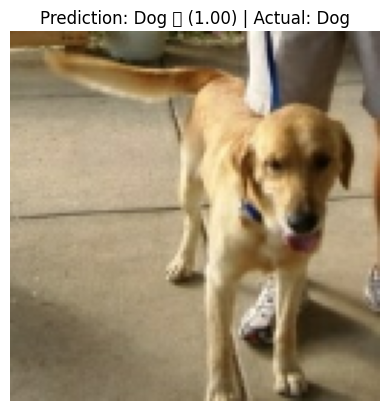

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# تحميل النموذج المدرب
model = tf.keras.models.load_model("cats_vs_dogs_fine_tuned.h5")

# تحميل نفس بيانات الاختبار التي استخدمناها أثناء التدريب
dataset_name = "cats_vs_dogs"
_, ds_test = tfds.load(dataset_name, split=["train[:80%]", "train[80%:]"], as_supervised=True)

#  تجهيز البيانات بنفس الطريقة التي استخدمناها في التدريب
IMG_SIZE = (128, 128)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # تصغير الحجم
    image = image / 255.0  # تطبيع القيم بين 0 و 1
    return image, label

ds_test = ds_test.map(preprocess).batch(1)  # استخدام batch=1 لأخذ صورة واحدة

# اختيار صورة عشوائية من بيانات الاختبار
for image, label in ds_test.take(1):  # أخذ أول صورة فقط من بيانات الاختبار
    prediction = model.predict(image)[0][0]
    predicted_label = "Dog" if prediction > 0.5 else "Cat"

    # عرض الصورة مع التوقع الفعلي للنموذج
    plt.imshow(image[0])  # عرض الصورة
    plt.title(f"Prediction: {predicted_label} ({prediction:.2f}) | Actual: {'Dog' if label.numpy()[0] == 1 else 'Cat'}")
    plt.axis("off")
    plt.show()